In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
wisc = pd.read_csv("E:/Python Programs/wisc_bc_data.csv")
wisc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
wisc.shape

(569, 32)

In [6]:
wisc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
wisc.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [23]:
X = wisc[["radius_worst","concavity_worst","concave points_worst"]]
y = wisc["diagnosis"]

In [24]:
X.describe()

,radius_worst,concavity_worst,concave points_worst
count,569.000000,569.000000,569.000000
mean,16.269190,0.272188,0.114606
std,4.833242,0.208624,0.065732
min,7.930000,0.000000,0.000000
25%,13.010000,0.114500,0.064930
50%,14.970000,0.226700,0.099930
75%,18.790000,0.382900,0.161400
max,36.040000,1.252000,0.291000


In [25]:
X_scaled = pd.DataFrame(minmax_scale(X), columns=X.columns)
X_scaled.head()

,radius_worst,concavity_worst,concave points_worst
0,0.620776,0.568610,0.912027
1,0.606901,0.192971,0.639175
2,0.556386,0.359744,0.835052
3,0.248310,0.548642,0.884880
4,0.519744,0.319489,0.558419


In [26]:
X_scaled.describe()

,radius_worst,concavity_worst,concave points_worst
count,569.000000,569.000000,569.000000
mean,0.296663,0.217403,0.393836
std,0.171940,0.166633,0.225884
min,0.000000,0.000000,0.000000
25%,0.180719,0.091454,0.223127
50%,0.250445,0.181070,0.343402
75%,0.386339,0.305831,0.554639
max,1.000000,1.000000,1.000000


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=40)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 3), (426,), (143, 3), (143,))

In [37]:
np.sqrt(426)

20.639767440550294

In [28]:
accuracy_uniform = []
for k in range(1,40,2):
    model = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    model.fit(X_train, y_train)
    accuracy_uniform.append(model.score(X_test, y_test))

print(accuracy_uniform)

[0.965034965034965, 0.972027972027972, 0.965034965034965, 0.972027972027972, 0.965034965034965, 0.972027972027972, 0.972027972027972, 0.958041958041958, 0.965034965034965, 0.965034965034965, 0.965034965034965, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.972027972027972]


In [29]:
accuracy_distance = []
for k in range(1,40,2):
    model = KNeighborsClassifier(n_neighbors=k, weights="distance")
    model.fit(X_train, y_train)
    accuracy_distance.append(model.score(X_test, y_test))

print(accuracy_distance)

[0.965034965034965, 0.972027972027972, 0.972027972027972, 0.965034965034965, 0.958041958041958, 0.965034965034965, 0.965034965034965, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.9790209790209791, 0.972027972027972, 0.972027972027972, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791, 0.9790209790209791]


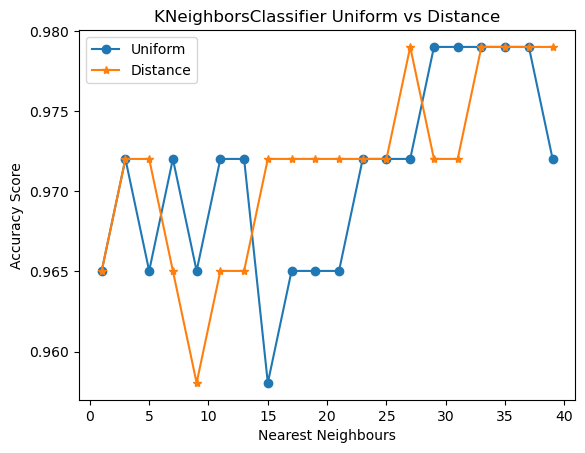

In [30]:
plt.plot(range(1,40,2), accuracy_uniform, marker="o", label="Uniform")
plt.plot(range(1,40,2), accuracy_distance, marker="*", label="Distance")
plt.legend()
plt.xlabel("Nearest Neighbours")
plt.ylabel("Accuracy Score")
plt.title("KNeighborsClassifier Uniform vs Distance")
plt.show()

In [33]:
model_KNN_uniform = KNeighborsClassifier(n_neighbors=29, weights="uniform")
model_KNN_uniform.fit(X_train,y_train)
model_KNN_uniform.score(X_test,y_test)

0.9790209790209791

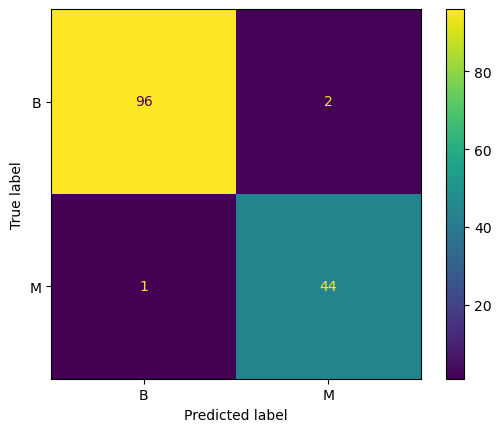

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, model_KNN_uniform.predict(X_test))
plt.show()

In [35]:
model_KNN_distance = KNeighborsClassifier(n_neighbors=27, weights="distance")
model_KNN_distance.fit(X_train,y_train)
model_KNN_distance.score(X_test,y_test)

0.9790209790209791

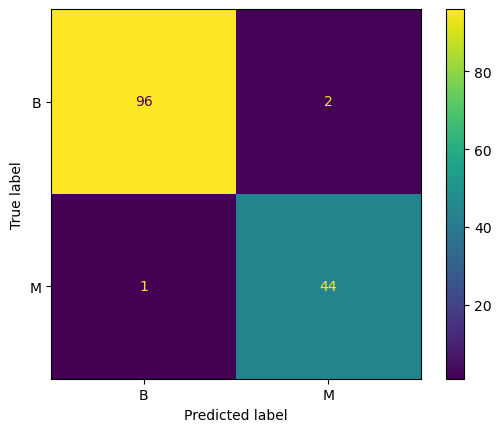

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, model_KNN_distance.predict(X_test))
plt.show()

In [45]:
accuracy_uniform_rad = []
for k in range(1,20):
    model = RadiusNeighborsClassifier(radius=k, weights="uniform")
    model.fit(X_train, y_train)
    accuracy_uniform_rad.append(model.score(X_test, y_test))

print(accuracy_uniform_rad)

[0.6993006993006993, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853, 0.6853146853146853]


In [46]:
accuracy_distance_rad = []
for k in range(1,20):
    model = RadiusNeighborsClassifier(radius=k, weights="distance")
    model.fit(X_train, y_train)
    accuracy_distance_rad.append(model.score(X_test, y_test))

print(accuracy_distance_rad)

[0.958041958041958, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951]


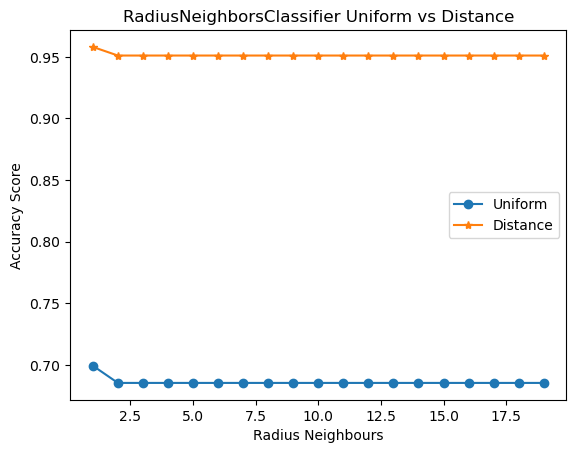

In [47]:
plt.plot(range(1,20), accuracy_uniform_rad, marker="o", label="Uniform")
plt.plot(range(1,20), accuracy_distance_rad, marker="*", label="Distance")
plt.legend()
plt.xlabel("Radius Neighbours")
plt.ylabel("Accuracy Score")
plt.title("RadiusNeighborsClassifier Uniform vs Distance")
plt.show()

In [52]:
model_Rad_uniform = RadiusNeighborsClassifier(radius=0.2, weights="uniform")
model_Rad_uniform.fit(X_train,y_train)
model_Rad_uniform.score(X_test,y_test)

0.965034965034965

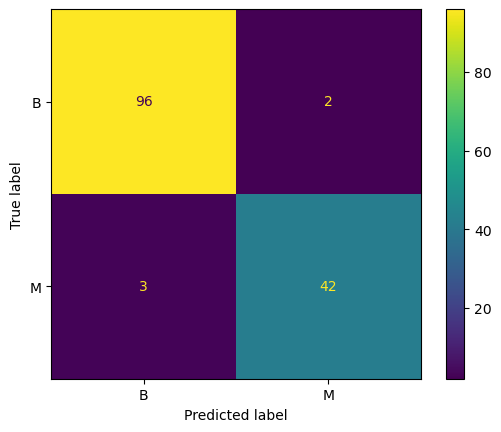

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test, model_Rad_uniform.predict(X_test))
plt.show()

In [54]:
model_Rad_distance = RadiusNeighborsClassifier(radius=0.2, weights="distance")
model_Rad_distance.fit(X_train,y_train)
model_Rad_distance.score(X_test,y_test)

0.972027972027972

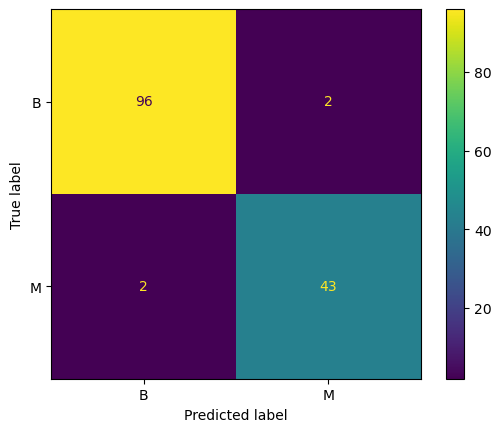

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, model_Rad_distance.predict(X_test))
plt.show()